**Import Library & ZIP**

In [8]:
import zipfile
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from google.colab import files

print(tf.__version__)

2.5.0


In [9]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-07-18 06:33:24--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.48MB/s    in 75s     

2021-07-18 06:34:40 (4.13 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**Ekstrak ZIP**

In [10]:
zipku = '/tmp/rockpaperscissors.zip'
zip_zip = zipfile.ZipFile(zipku, 'r')
zip_zip.extractall('/tmp')
zip_zip.close()

**Cek Data ZIP**

In [11]:
folder_scissors = os.path.join("/tmp/rockpaperscissors/rps-cv-images/scissors")
folder_paper = os.path.join("/tmp/rockpaperscissors/rps-cv-images/paper")
folder_rock = os.path.join("/tmp/rockpaperscissors/rps-cv-images/rock")
folder_tmp = "/tmp/rockpaperscissors/rps-cv-images"
# Hitung panjang data
cek_scissors = len(os.listdir(folder_scissors))
cek_paper = len(os.listdir(folder_paper))
cek_rock = len(os.listdir(folder_rock))
print(cek_scissors, cek_paper, cek_rock)

750 712 726


**Split Folder**

In [12]:
pip install split-folders

In [13]:
import splitfolders

**Tentukan Ratio**

In [14]:
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/data", seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 3546.17 files/s]


**Cek Classes**

In [15]:
os.listdir('/tmp/rockpaperscissors/data/train')
os.listdir('/tmp/rockpaperscissors/data/val')
# Output 1 berarti sama

['paper', 'scissors', 'rock']

In [16]:
file_main = '/tmp/rockpaperscissors/data'
dir_train = os.path.join(file_main, 'train')
dir_validation = os.path.join(file_main, 'val')

**Set Data**

In [17]:
val_size = 0.4

**Validasi Generator**

In [31]:
train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

test_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

In [40]:
train_generator = train_datagen.flow_from_directory(
    folder_tmp,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True,
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    folder_tmp,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = False,
    subset = "validation"
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**Model**

In [41]:
# RELU
Model = Sequential([
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape=(150, 150, 3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),
     Dropout(0.2),
     Dense(128, activation = 'relu'),
     Dense(3, activation='softmax')
])

In [42]:
Adam(learning_rate=0.00146, name='Adam')
Model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

**Training**

In [43]:
Model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2)

Epoch 1/20
30/30 - 27s - loss: 1.1106 - accuracy: 0.4077 - val_loss: 1.1326 - val_accuracy: 0.1875
Epoch 2/20
30/30 - 25s - loss: 0.9883 - accuracy: 0.4979 - val_loss: 0.5299 - val_accuracy: 0.8375
Epoch 3/20
30/30 - 27s - loss: 0.8621 - accuracy: 0.6266 - val_loss: 0.6924 - val_accuracy: 0.7125
Epoch 4/20
30/30 - 26s - loss: 0.6150 - accuracy: 0.7563 - val_loss: 0.6405 - val_accuracy: 0.7750
Epoch 5/20
30/30 - 26s - loss: 0.5031 - accuracy: 0.8146 - val_loss: 0.6690 - val_accuracy: 0.7875
Epoch 6/20
30/30 - 26s - loss: 0.3964 - accuracy: 0.8625 - val_loss: 1.0148 - val_accuracy: 0.5375
Epoch 7/20
30/30 - 26s - loss: 0.4770 - accuracy: 0.8125 - val_loss: 0.7387 - val_accuracy: 0.6500
Epoch 8/20
30/30 - 25s - loss: 0.3765 - accuracy: 0.8604 - val_loss: 0.6112 - val_accuracy: 0.7375
Epoch 9/20
30/30 - 25s - loss: 0.3595 - accuracy: 0.8438 - val_loss: 0.6184 - val_accuracy: 0.7375
Epoch 10/20
30/30 - 25s - loss: 0.3575 - accuracy: 0.8729 - val_loss: 0.7709 - val_accuracy: 0.6875
Epoch 11/

**Prediksi Hasil**

Saving 63999.jpg to 63999.jpg
63999.jpg
scissors


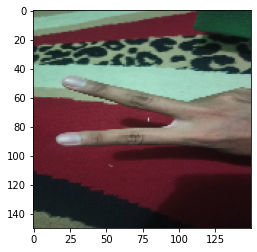

In [44]:
uploaded = files.upload()

for up_file in uploaded.keys():
  path = up_file
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = Model.predict(images, batch_size=16)
  hasil = np.argmax(classes)
  
  # 0 == scissors
  # 1 == rock
  # 2 == paper

  print(up_file)
  if hasil == 0:
    print('scissors')
  elif hasil == 1:
    print('rock')
  elif hasil == 2:
    print('paper')